In [97]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

# get current RMG model:
rmg_model_folder = "/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/MeOH_RMG/meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

In [98]:
#######################################################################
# Input Parameters for combustor
#######################################################################
          
# sbr_tran = sbr(
#     cti_file_path,
#     rmg_model_folder, 
#     t_array=[528],
#     p_array=[75],
#     v_array=[0.00424],
#     h2_array=[0.75],
#     co2_array=[0.5],
#     rtol=1.0e-11,
#     atol=1.0e-22,
#     reactor_type=0,
#     energy="off",
#     sensitivity=False,
#     sensatol=1e-6,
#     sensrtol=1e-6,
#     reactime=1e5,
#     grabow=False,
# )

In [99]:
# sbr_tran.run_reactor_transient()

In [100]:
sbr_ss = sbr(
    cti_file_path,
    rmg_model_folder, 
    t_array=[528],
    p_array=[75],
    v_array=[0.00424],
    h2_array=[0.75],
    co2_array=[0.5],
    rtol=1.0e-11,
    atol=1.0e-22,
    reactor_type=0,
    energy="off",
    sensitivity=False,
    sensatol=1e-6,
    sensrtol=1e-6,
    reactime=1e5,
    grabow=False,
)

In [101]:
sbr_ss.run_reactor_ss()

Graph saved to: /Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/MeOH_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/2021_08_13_0853_1a314e_removed_grabow_rates_from_training/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end-pretty.dot
Wrote graphviz input file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/MeOH_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/2021_08_13_0853_1a314e_removed_grabow_rates_from_training/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end.dot'.
Wrote graphviz output file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/MeOH_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/2021_08_13_0853_1a314e_removed_grabow_rates_from_training/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end.png'.
Graph saved to: /Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/Me

Wrote graphviz input file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/MeOH_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/2021_08_13_0853_1a314e_removed_grabow_rates_from_training/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_X_surface1_end.dot'.
Wrote graphviz output file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/MeOH_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/2021_08_13_0853_1a314e_removed_grabow_rates_from_training/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_X_surface1_end.png'.


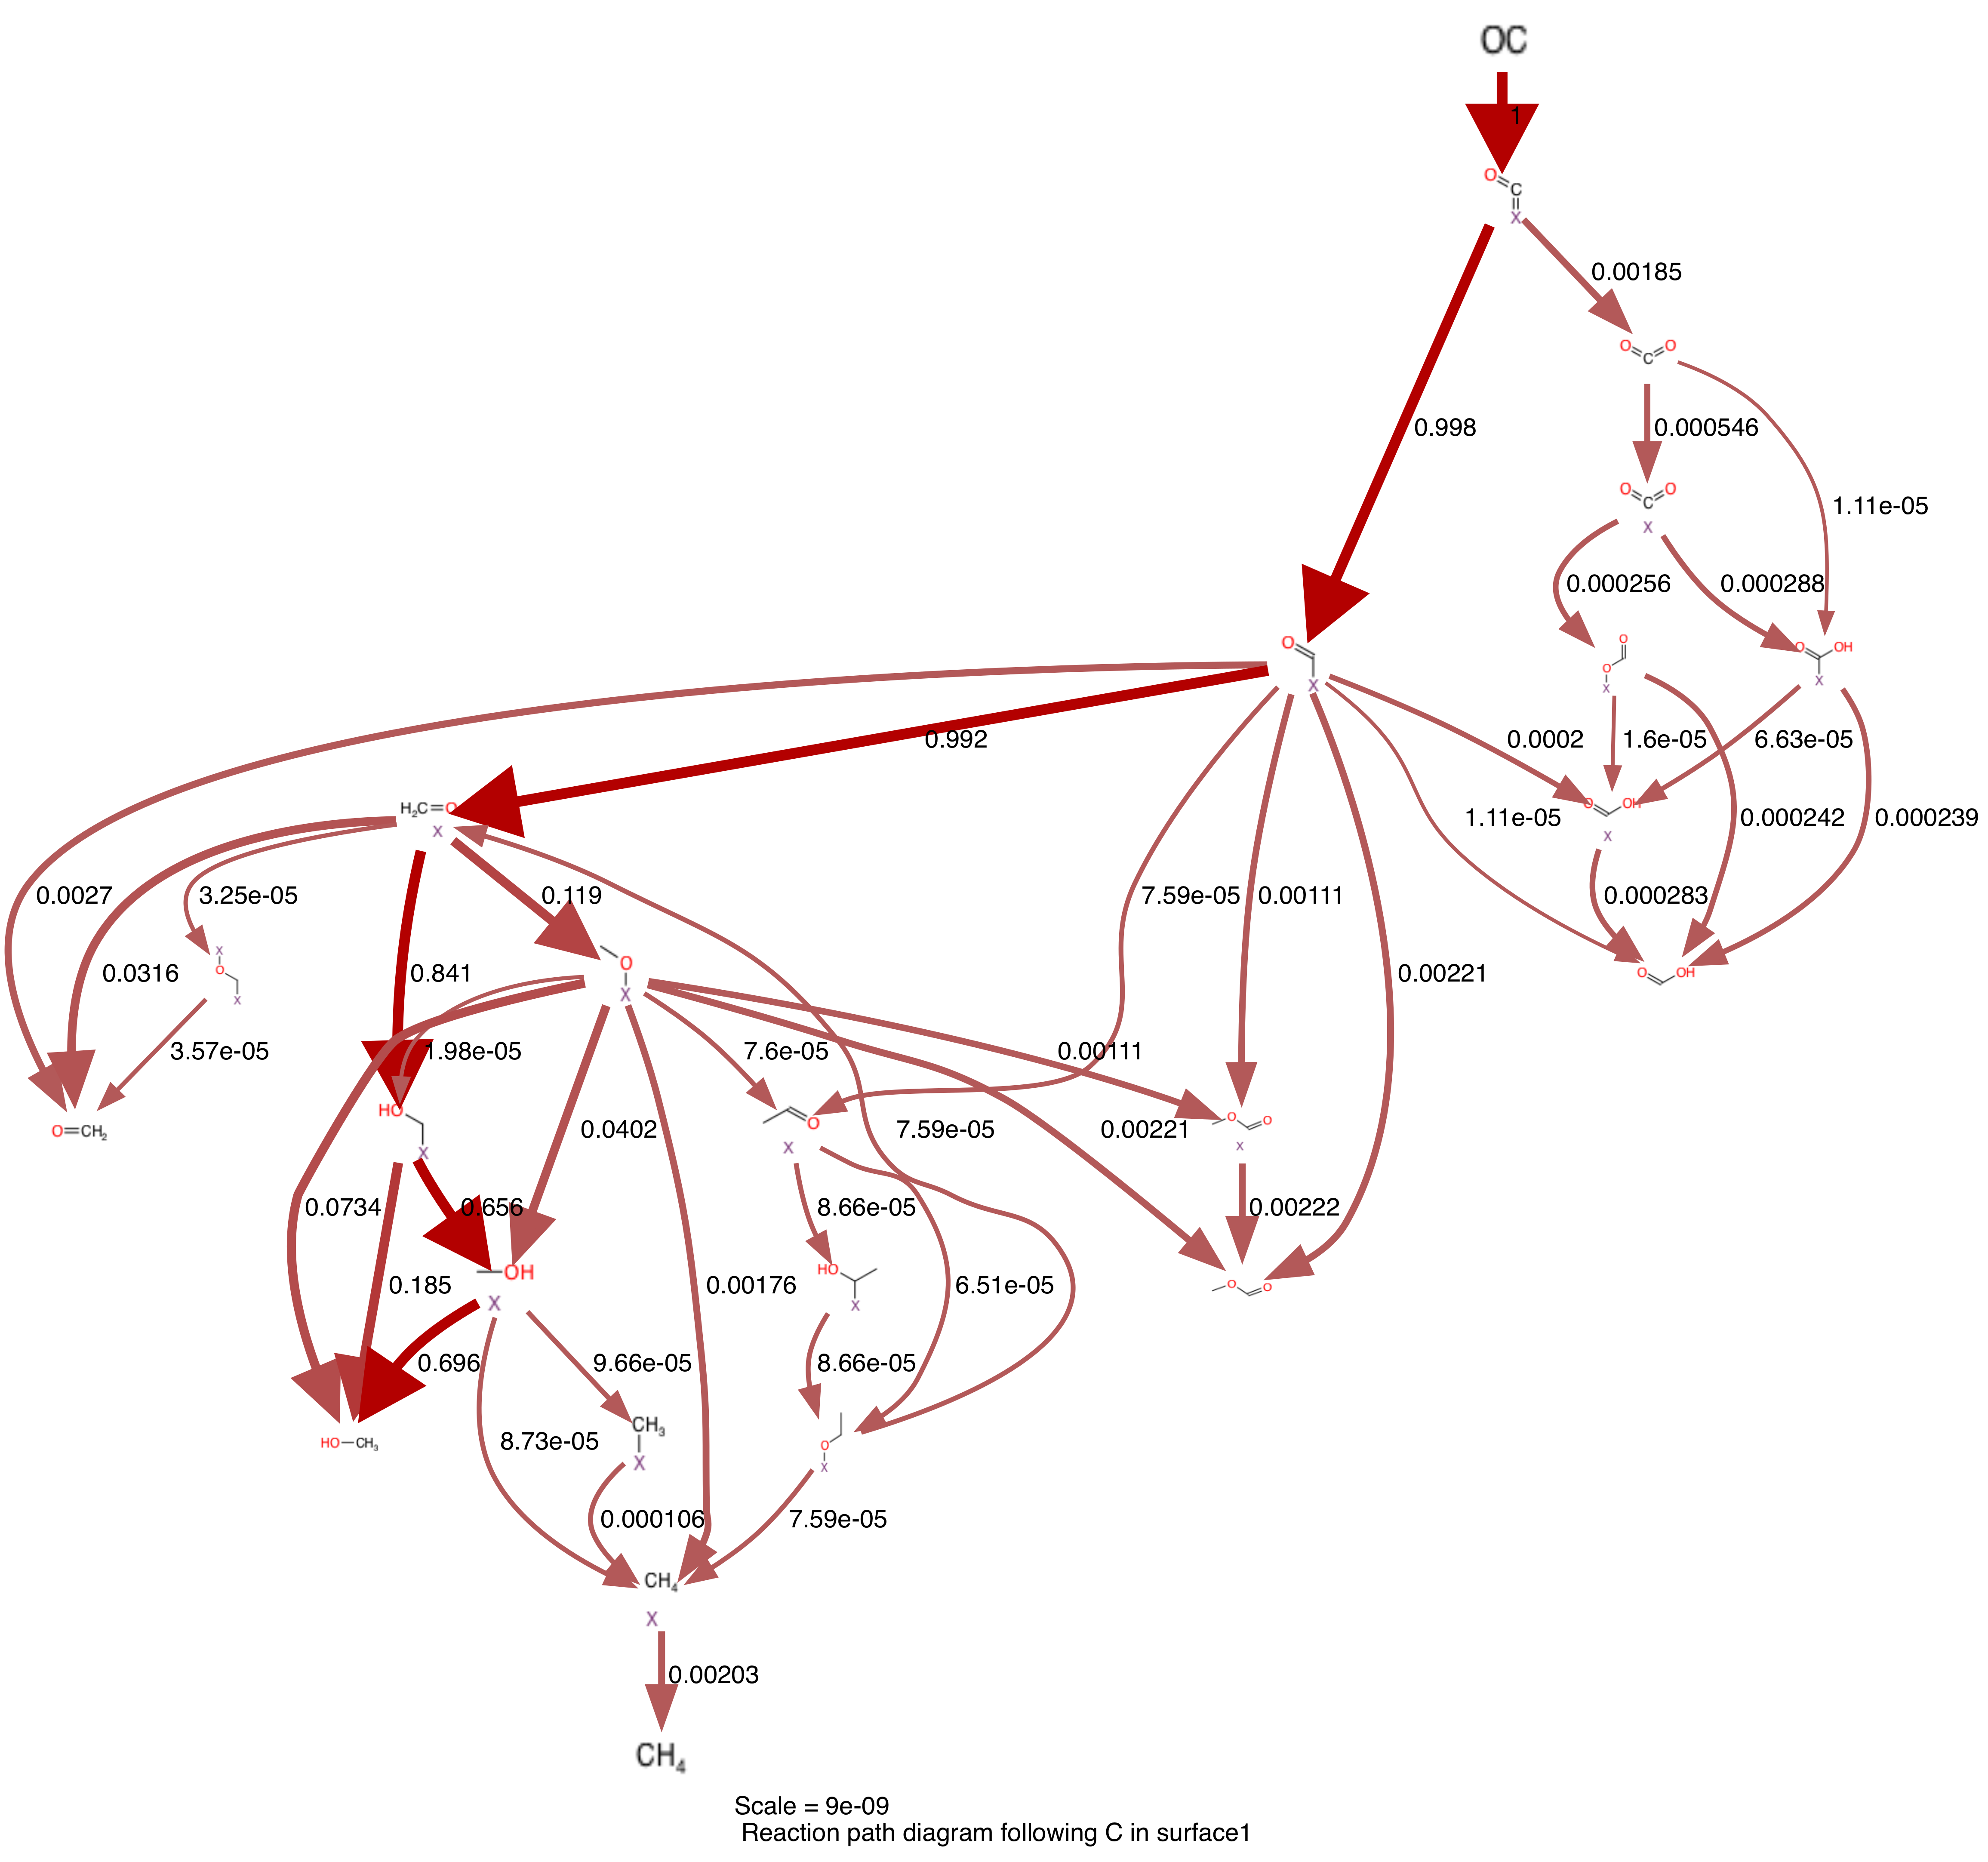

In [102]:
file = sbr_ss.flux_path + '/reaction_path_C_surface1_end-pretty.png'
Image(filename=file, width = 600) 

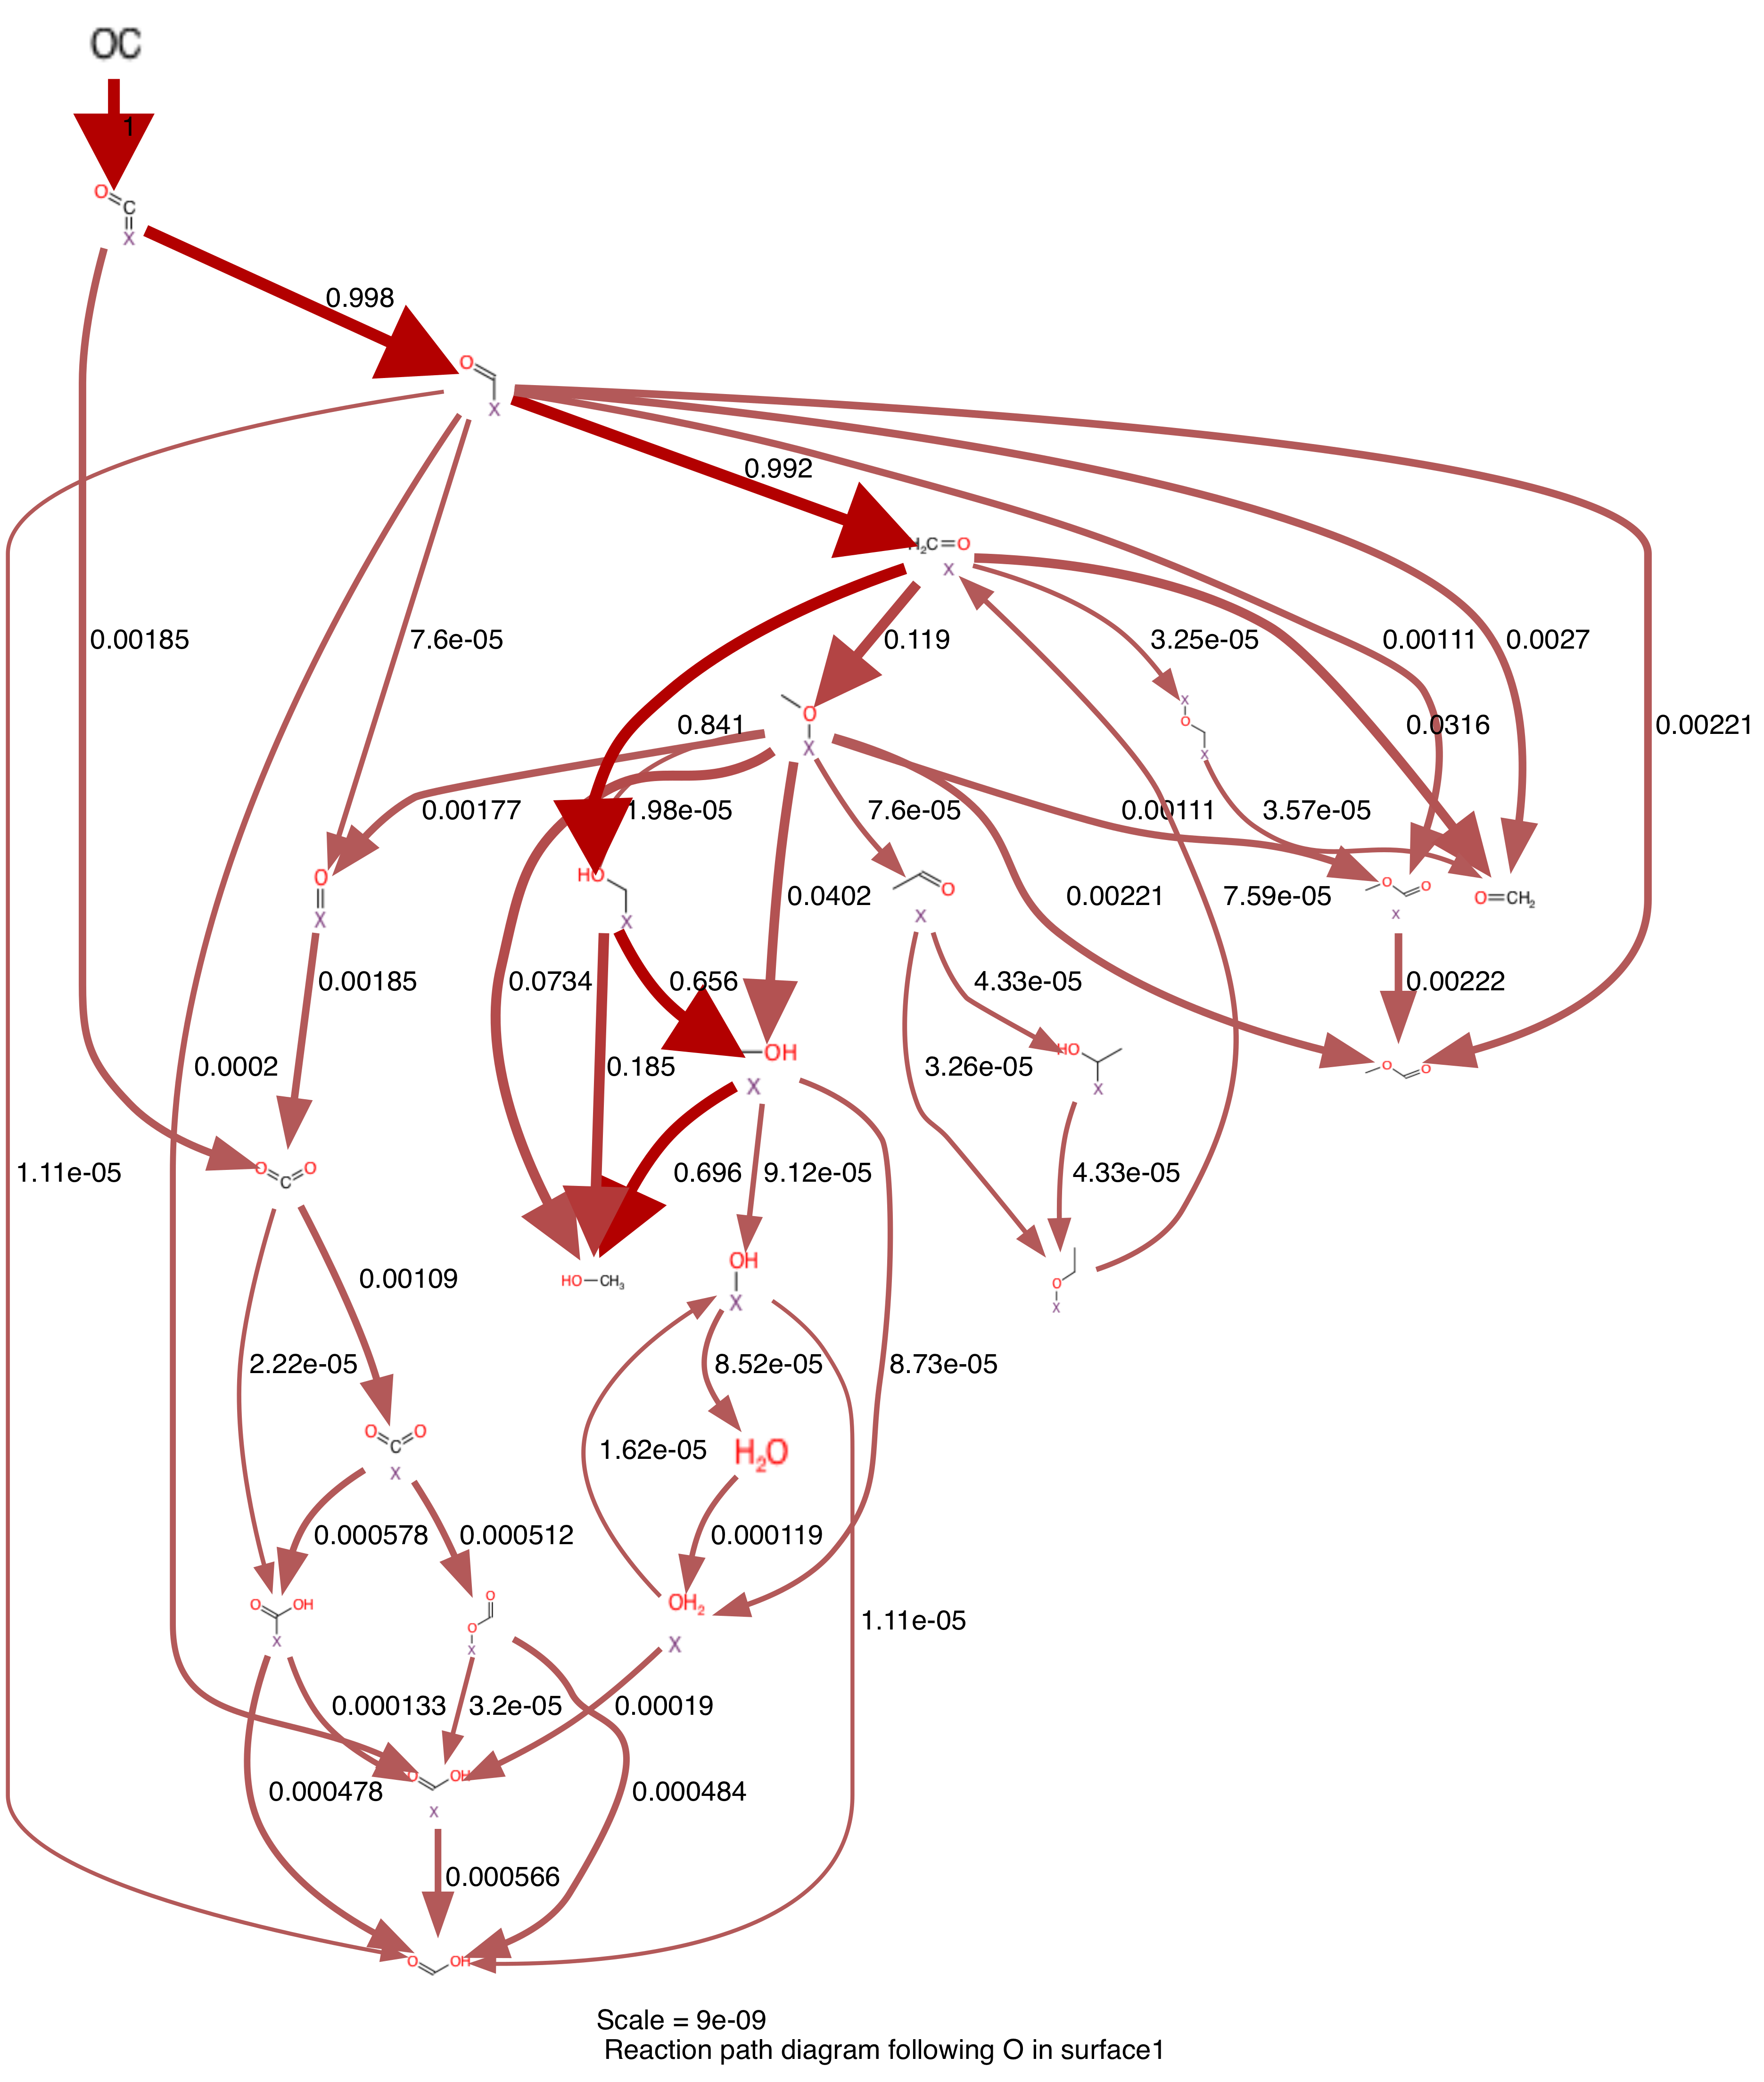

In [103]:
file = sbr_ss.flux_path + '/reaction_path_O_surface1_end-pretty.png'
Image(filename=file, width = 600) 

## potential energy surface 
enthalpy vs reaction coordinate

1 eV = ~96 kj/mol

In [9]:
sbr_ss.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'CH3OX(49)',
 'H2X(53)',
 'CH2OX2(55)',
 'SX(56)',
 'COXX(63)',
 'CHOX2(64)',
 'CH4X(66)',
 'SX(277)',
 'SX(350)',
 'SX(386)']

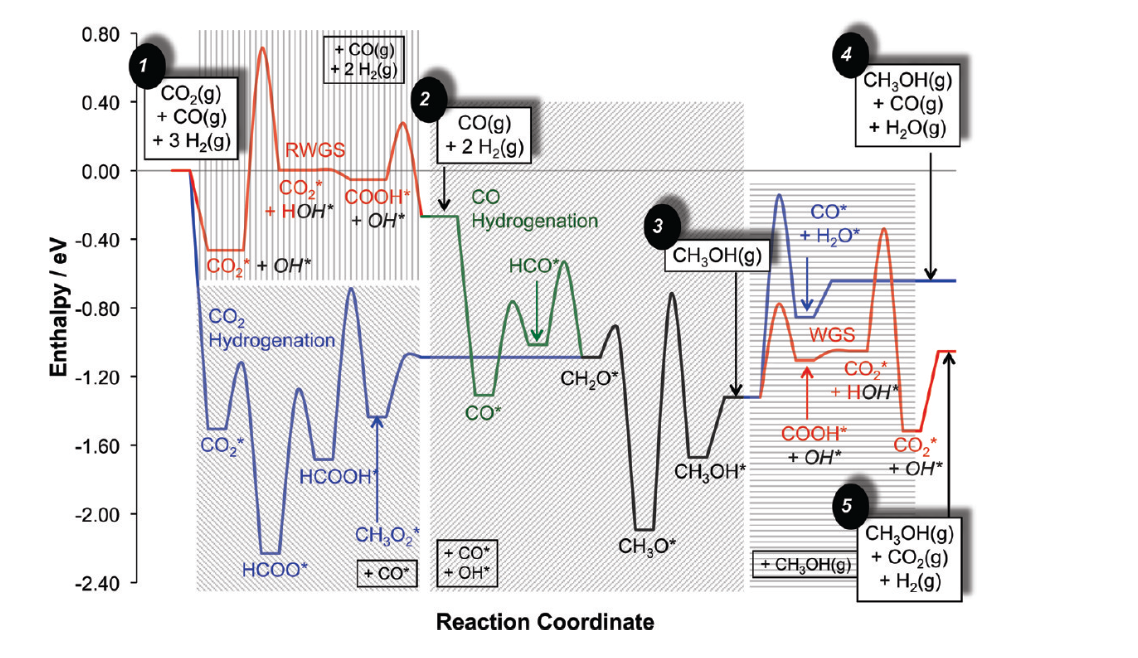

In [10]:
file = ('../images/Grabow_plots/Grabow_PES.png')
Image(filename=file, width = 600) 

we are missing CO2 mechanism, so let's compare thermo and barriers for CO2, CO2X, HCOOX, HCOOHX, CH3O2X, and CH2OX

## make function for finding all reactions containing a species

In [69]:
from energydiagram import ED
diagram = ED()

In [70]:
def get_h_ev(species, temp):
    """
    gets species enthalpy in eV. 
    species is a cantera Species object
    """
    h_eV = (species.thermo.h(temp)/1000**2)/96
    print(f'{species.name} enthalpy = {h_eV} eV')
    return h_eV

In [71]:
def get_ea_ev(reaction):
    """
    gets reaction Ea in eV. 
    reaction is a cantera Reaction object
    """
    Ea_eV = (reaction.rate.activation_energy/1000**2)/96
    print(f'{reaction.equation} enthalpy = {Ea_eV} eV')
    return Ea_eV

In [72]:
def find_reactions(species, temp):
    """
    find all reactions that involve a certain species.
    species is a species object
    rxns is a dictionary, reaction equation is the key, reaction object is the value
    """
    rxns = {}
    species_names = [i.name for i in species]
    species_ea = get_h_ev(species[1], temp)
    
    for i,j in enumerate(sbr_ss.gas.reaction_equations()):
        if all(x in j for x in species_names):
            rxns[j] = sbr_ss.gas.reaction(i)
            Ea = species_ea + (sbr_ss.gas.reaction(i).rate.activation_energy/1000**2)/96
            print(j, Ea)
            
    for i,j in enumerate(sbr_ss.surf.reaction_equations()):
        if all(x in j for x in species_names):
            rxns[j] = sbr_ss.surf.reaction(i)
            Ea = species_ea + (sbr_ss.surf.reaction(i).rate.activation_energy/1000**2)/96
            print(j, Ea)
            
    return rxns

reference energy as we calculate it for CO2, CO, 3H2 gas reactants is even more negative, instead of being above the intermediates. There is something missing here. 

In [74]:
reactant1 = sbr_ss.gas.species("CO(3)")
reactant2 = sbr_ss.gas.species("CO2(4)")
reactant3 = sbr_ss.gas.species("H2(2)")
H_eV_co = get_h_ev(reactant1, 499)
H_eV_co2 = get_h_ev(reactant2, 499)
H_eV_h2 = get_h_ev(reactant3, 499)

h_eV_ref = H_eV_co + H_eV_co2 + 3*H_eV_h2
h_eV_ref

CO(3) enthalpy = -1.085116993792058 eV
CO2(4) enthalpy = -4.007865502220364 eV
H2(2) enthalpy = 0.06085351498075062 eV


-4.91042195107017

In [75]:
reactant = sbr_ss.gas.species("CO2(4)")
product = sbr_ss.surf.species("CO2*(15)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.99,"CO2(4)")
diagram.add_level(-3.94,"Ea1") #"CO2(4) + X(1) <=> CO2*(15)")

CO2(4) enthalpy = -4.007865502220364 eV
CO2*(15) enthalpy = -3.950846963999888 eV
CO2(4) + X(1) <=> CO2*(15) -3.950846963999888


In [76]:
reactant = sbr_ss.surf.species("CO2*(15)")
product = sbr_ss.surf.species("HCOO*(17)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.93,"CO2*(15)")
diagram.add_level(-3.08,"Ea2") #"CO2*(15) + H*(10) <=> HCOO*(17) + X(1)")

CO2*(15) enthalpy = -3.950846963999888 eV
HCOO*(17) enthalpy = -3.9746599827871623 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) -3.100247566120496
CO2*(15) + OH*(12) <=> HCOO*(17) + O*(11) -3.552555399453829
CO2*(15) + H2O*(13) <=> HCOO*(17) + OH*(12) -2.9908098161204957
CO2*(15) + HCO*(16) <=> CO*(14) + HCOO*(17) -3.552555399453829
CO2*(15) + HCOOH*(19) <=> 2 HCOO*(17) -2.9908098161204957
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -2.9908098161204957
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -2.9908098161204957
CH2O*(20) + CO2*(15) <=> HCO*(16) + HCOO*(17) -2.9908098161204957
CH3OH*(23) + CO2*(15) <=> CH3O*(21) + HCOO*(17) -2.9908098161204957
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -2.9908098161204957
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -2.9908098161204957
CO2*(15) + H2X(53) <=> H*(10) + HCOO*(17) -2.9908098161204957
CHOX2(64) + CO2*(15) <=> COXX(63) + HCOO*(17) -3.552555399453829
CH2OX2(55) + CO2*(15) <=> CHOX2(64) + HCOO*(17) -3.552555399453829
CH3OH*(23)

In [77]:
reactant = sbr_ss.surf.species("HCOO*(17)")
product = sbr_ss.surf.species("HCOOH*(19)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.95,"HCOO*(17)")
diagram.add_level( -3.43,"Ea3") # "H*(10) + HCOO*(17) <=> HCOOH*(19) + X(1)")

HCOO*(17) enthalpy = -3.9746599827871623 eV
HCOOH*(19) enthalpy = -4.3644405243679705 eV
H*(10) + HCOO*(17) <=> HCOOH*(19) + X(1) -3.4498442743679703
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -3.0273910243679705
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -2.0894341077013037
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -3.0273910243679705
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -2.0894341077013037
HCOOH*(19) + OH*(12) <=> H2O*(13) + HCOO*(17) -4.3644405243679705
HCO*(16) + HCOO*(17) <=> CO*(14) + HCOOH*(19) -3.7614215243679707
CO2*(15) + HCOOH*(19) <=> 2 HCOO*(17) -3.380590357701304
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.380590357701304
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.380590357701304
CH2O*(20) + HCOO*(17) <=> HCO*(16) + HCOOH*(19) -4.3644405243679705
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.380590357701304
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.380590357701304
COOH*(18) + HCOOH*(19) <=> HCOO*(17) + HCOOH*(19) -4.3644405243679705

In [78]:
reactant = sbr_ss.surf.species("HCOOH*(19)")
product = sbr_ss.surf.species("CH3O2*(22)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-4.36,"HCOOH*(19)")
diagram.add_level(-2.79,"Ea4") #H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1)

HCOOH*(19) enthalpy = -4.3644405243679705 eV
CH3O2*(22) enthalpy = -3.8322594727897674 eV
H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1) -2.787000389456434
HCOOH*(19) + OH*(12) <=> CH3O2*(22) + O*(11) -3.3610800561231007
H2O*(13) + HCOOH*(19) <=> CH3O2*(22) + OH*(12) -2.4058205561231008
HCO*(16) + HCOOH*(19) <=> CH3O2*(22) + CO*(14) -3.410154889456434
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -2.848409306123101
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -2.848409306123101
2 HCOOH*(19) <=> CH3O2*(22) + HCOO*(17) -2.848409306123101
2 HCOOH*(19) <=> CH3O2*(22) + COOH*(18) -2.763247472789767
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -2.848409306123101
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -2.848409306123101
CH3OH*(23) + HCOOH*(19) <=> CH3O*(21) + CH3O2*(22) -2.617112556123101
H2X(53) + HCOOH*(19) <=> CH3O2*(22) + H*(10) -2.848409306123101
CHOX2(64) + HCOOH*(19) <=> CH3O2*(22) + COXX(63) -3.410154889456434
CH2OX2(55) + HCOOH*(19) <=> CH3O2*(22) + CHOX2(64) -3.07804

In [79]:
reactant = sbr_ss.surf.species("CH3O2*(22)")
product = sbr_ss.surf.species("CH2O*(20)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.83,"CH3O2*(22)")
diagram.add_level(-1.59,"Ea5") #H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1)

CH3O2*(22) enthalpy = -3.8322594727897674 eV
CH2O*(20) enthalpy = -1.589566526971878 eV
CH2O*(20) + OH*(12) <=> CH3O2*(22) + X(1) -1.589566526971878
CH2O*(20) + H2O*(13) <=> CH3O2*(22) + H*(10) -0.6057163603052113
CH2O*(20) + COOH*(18) <=> CH3O2*(22) + CO*(14) -1.1674619436385447
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -0.6057163603052113
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -0.6057163603052113
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -0.6057163603052113
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -0.6057163603052113
CH2O*(20) + SX(56) <=> CH3O2*(22) + CHOX2(64) 1.0217724730281221


In [80]:
reactant = sbr_ss.surf.species("CH2O*(20)")
H_eV = get_h_ev(reactant, 499)
diagram.add_level(-1.59,"CH2O*(20)")

CH2O*(20) enthalpy = -1.589566526971878 eV


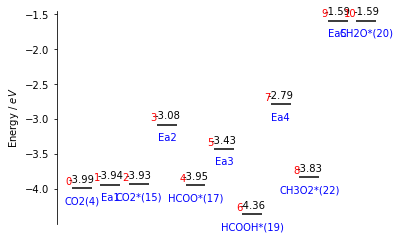

In [81]:
diagram.plot(show_IDs=True, ylabel="Energy / $eV$") # this is the default ylabel

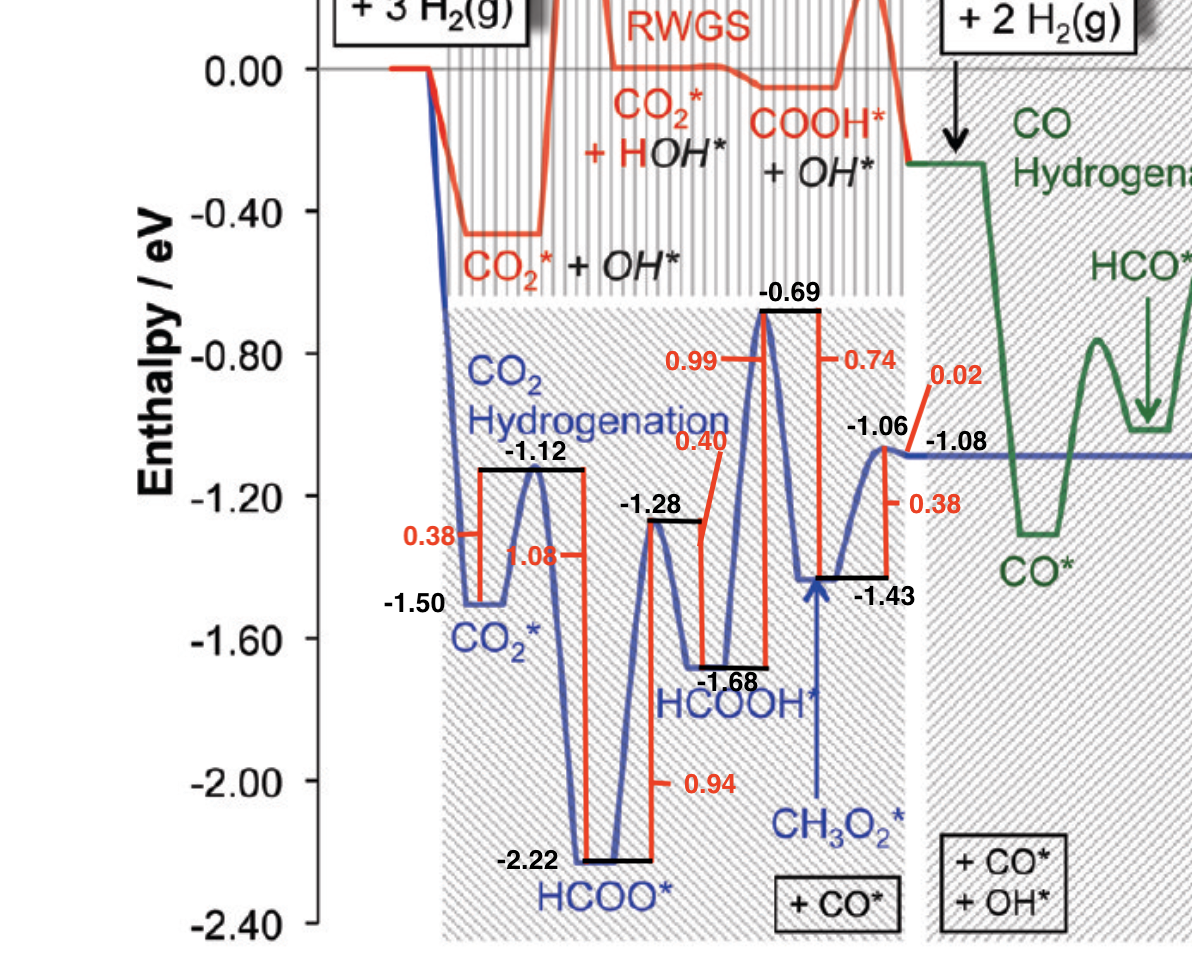

In [65]:
file = ('../images/Grabow_plots/Grabow_PES_CO2.png')
Image(filename=file, width = 600) 

### get equilibrium surface coverages

In [24]:
for i in zip(sbr_ss.surf.species_names, sbr_ss.surf.X):
    print(i)

('X(1)', 0.0013900527140027436)
('H*(10)', 7.31745747753242e-05)
('O*(11)', 1.7651159851718905e-13)
('OH*(12)', 4.4579188931667905e-15)
('H2O*(13)', 9.510017132756118e-06)
('CO*(14)', 0.0007612111375337495)
('CO2*(15)', 3.614093054188461e-08)
('HCO*(16)', 1.1578481319435703e-05)
('HCOO*(17)', 2.8624975380363215e-13)
('COOH*(18)', 1.2774418943313308e-12)
('HCOOH*(19)', 2.809071917360462e-13)
('CH2O*(20)', 2.691689155976204e-07)
('CH3O*(21)', 4.870306123987651e-12)
('CH3O2*(22)', 4.912935142364428e-18)
('CH3OH*(23)', 2.1367376835713355e-10)
('CH3OX(49)', 1.1272045950171092e-10)
('H2X(53)', 0.006179078486886286)
('CH2OX2(55)', 1.982572414408036e-17)
('SX(56)', 0.0004516652427301271)
('COXX(63)', 1.1658267328815238e-09)
('CHOX2(64)', 6.985632529516705e-17)
('CH4X(66)', 5.911256859027985e-10)
('SX(277)', 0.0005083183248503855)
('SX(350)', 1.9621925404278086e-13)
('SX(386)', 0.9906151036204842)


it appears that not much CO2 is adsorbed. this could be why we do not see much in that path

In [27]:
sbr_ss.species_path + "/SX(386).png"

'/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/MeOH_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/2021_08_08_2243_bad060_used_david_s_forbidden_species_PR/species_pictures/SX(386).png'

## Pictures of Key species

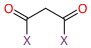

In [29]:
file = sbr_ss.species_path + "/SX(386).png"
Image(filename=file, width = 100) 

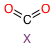

In [88]:
file = sbr_ss.species_path + "/CO2*(15).png"
Image(filename=file, width = 100) 

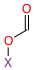

In [89]:
file = sbr_ss.species_path + "/HCOO*(17).png"
Image(filename=file, width = 80) 

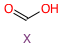

In [90]:
file = sbr_ss.species_path + "/HCOOH*(19).png"
Image(filename=file, width = 80) 

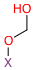

In [95]:
file = sbr_ss.species_path + "/CH3O2*(22).png"
Image(filename=file, width = 70) 

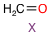

In [96]:
file = sbr_ss.species_path + "/CH2O*(20).png"
Image(filename=file, width = 70) 